## Credit Card Fraud Detection Model

# Problem Statement


Develop a machine learning model that can accurately predict fraudulent credit card transactions using a Kaggle dataset. The model should be able to identify patterns and anomalies in the data that can help detect fraudulent transactions in real-time, reducing financial losses and improving customer trust for banks and financial institutions.


# Project Goal

The primary goal of a credit card fraud detection model in machine learning is to accurately identify and prevent fraudulent transactions while minimizing false positives. This involves developing a robust, real-time system that can analyze transaction data and detect suspicious activity to protect both financial institutions and cardholders from financial losses.

# Project Summary

Project Description:

The credit card fraud prediction project involves developing a machine learning model that can identify fraudulent credit card transactions using a Kaggle dataset. The dataset contains 284,807 transactions, out of which 492 are fraudulent. The dataset is highly unbalanced, with a large number of legitimate transactions and a small number of fraudulent transactions.

Objective:

The objective of this project is to predict fraudulent credit card transactions using machine learning models. The goal is to develop a model that can accurately classify transactions as either fraudulent or legitimate, reducing financial losses and improving customer trust for banks and financial institution

Dataset:

The project uses the Credit Card Fraud Detection dataset from Kaggle, which contains 284,807 credit card transactions made by European cardholders over a period of two days in September 2013. The dataset is highly unbalanced, with 492 fraudulent transactions (0.172% of the total transactions

dels).s.

# Import Essential Libraries

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
credit_card_data = pd.read_csv(r"C:\Users\kavya\OneDrive\Desktop\MACHINE LEARNING DATA\FRUDE DETECTION\CREDIT_ DATA\creditcard.csv")


In [12]:
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
credit_card_data.sample()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
191839,129424.0,1.421382,-2.622433,-3.267575,-1.428155,-0.365466,-0.728727,0.58483,-0.587416,-2.37338,...,0.438482,0.584519,-0.625744,0.35892,0.507626,0.222255,-0.17669,-0.007573,522.26,0


# Informtion about the Dataset

In [14]:
# dataset informations
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Checking Missing values

In [15]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Axes: >

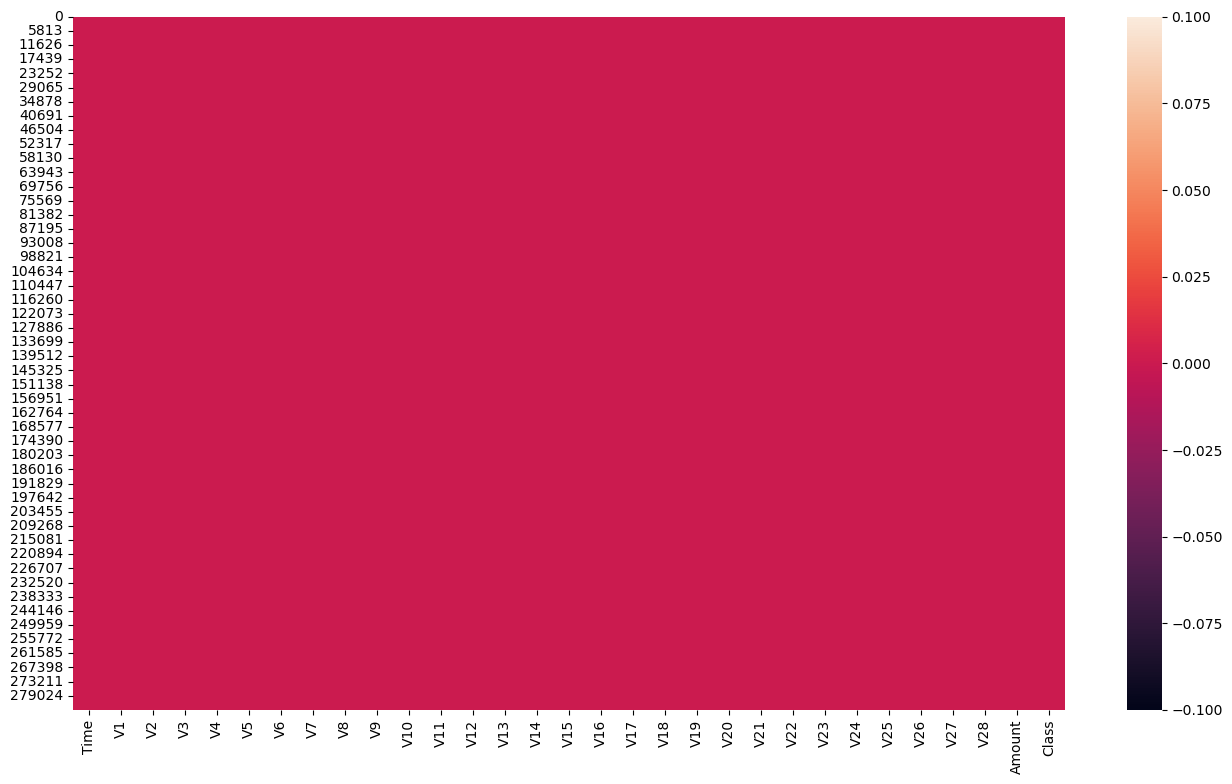

In [19]:
plt.figure(figsize=(16,9))
sns.heatmap(credit_card_data.isnull())

In [20]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [21]:
legit = credit_card_data[credit_card_data.Class==0]
fraud = credit_card_data[credit_card_data['Class']==1]

In [22]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

# Statistical measures of the data

In [23]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [24]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# Handling Missing Values

In [25]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [26]:
legit_sample = legit.sample(n=492)

In [27]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [28]:
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
92126,63789.0,-0.738393,1.130444,1.770963,2.712081,-0.069138,1.904566,-0.257849,0.825374,-1.008334,...,0.032693,0.128902,-0.094194,-1.301772,-0.108348,0.300223,0.043971,0.061779,67.49,0
137831,82348.0,1.312662,-0.034439,-1.210664,-0.542469,2.093704,3.228520,-0.457888,0.777862,-0.089503,...,-0.255515,-0.893817,0.042831,1.006017,0.471547,0.188480,-0.034676,0.008983,7.07,0
20677,31203.0,-2.120783,-3.055337,1.795647,-1.489538,-3.364142,0.516610,1.608818,-0.081476,-1.854043,...,0.191884,-0.385310,1.695103,0.600497,0.565524,-0.370509,-0.184788,0.137841,763.54,0
29248,35378.0,1.104168,-1.001382,1.569764,0.899360,-1.428135,1.466885,-1.526586,0.598104,0.389126,...,-0.428907,-0.332063,-0.024798,-0.314200,0.357939,-0.245714,0.135077,0.028310,30.00,0
131434,79600.0,-2.324152,0.165241,1.699868,-0.489449,-1.072347,2.015832,0.286647,0.835179,0.656702,...,-0.086775,0.119573,-0.407252,-0.547088,-0.239615,0.488657,-0.243060,-0.269242,232.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [29]:
new_df['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [30]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94662.835366,-0.049685,0.121272,-0.018027,-0.102800,0.019963,0.028922,-0.002617,-0.052444,-0.021655,...,-0.016848,0.034667,0.020086,0.013844,-0.038718,0.012878,0.000407,-0.012613,-0.001439,78.359167
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [31]:
X = new_df.drop(columns='Class', axis=1)
Y = new_df['Class']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

# Model Building

In [33]:
model=LogisticRegression()

# Training the  Model 

In [34]:
# training the Logistic Regression Model with Training Data
model.fit(X_train, Y_train)
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9466327827191868


C:\Users\kavya\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Accuracy  test 

In [35]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9238578680203046


## Accuracy score on Test Data :  0.934010152284264